# Medical Insurance Cost: Linear Regression Implementation

In [1]:
from IPython.display import Image

Image(
    url="http://mediad.publicbroadcasting.net/p/wnpr/files/201403/Health_insurance_paperwork.jpg",
    width=4000,
    height=3000,
)

### Introduction:

In this workbook, using the medical insurance cost [dataset](https://www.kaggle.com/mirichoi0218/insurance), and the `OLS.from_formula()` function from `statsmodels.api` module, two models that attempt to predict annual insurance costs will be developed. 

A significant portion of the implementation workflow will be focusing on data exploration and analyses- from which an understanding of the dataset will be derived, and possible new features for model improvement will be ascertained. 

The conclusion of the implementation workflow will be focused on the suitability of the models for prediction based on the criterion of successfully meeting key linear regression assumptions. 

### Workflow Outline:
1. [Importation of relevant modules.](#1)
2. [Data exploration and analyses.](#2)
3. [Feature creation, feature modification, and correlation check.](#3)
4. [Model implementation and evaluation.](#4) 
5. [Verification of linear regression assumptions.](#5) 
6. [Conclusion.](#6) 

<a id="1"></a> <br>
### 1. Importation of relevant modules.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
import statsmodels.api as sm

<a id="2"></a> <br>
### 2. Data Exploration and Analyses.

In [3]:
insurance = pd.read_csv("insurance.csv").round(2)
insurance.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
5,31,female,25.74,0,no,southeast,3756.62
6,46,female,33.44,1,no,southeast,8240.59
7,37,female,27.74,3,no,northwest,7281.51
8,37,male,29.83,2,no,northeast,6406.41
9,60,female,25.84,0,no,northwest,28923.14


In [4]:
insurance.info()
# No null entries in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663572,1.094918,13270.422280
std,14.049960,6.097951,1.205493,12110.011259
min,18.000000,15.960000,0.000000,1121.870000
25%,27.000000,26.297500,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.692500,2.000000,16639.915000
max,64.000000,53.130000,5.000000,63770.430000


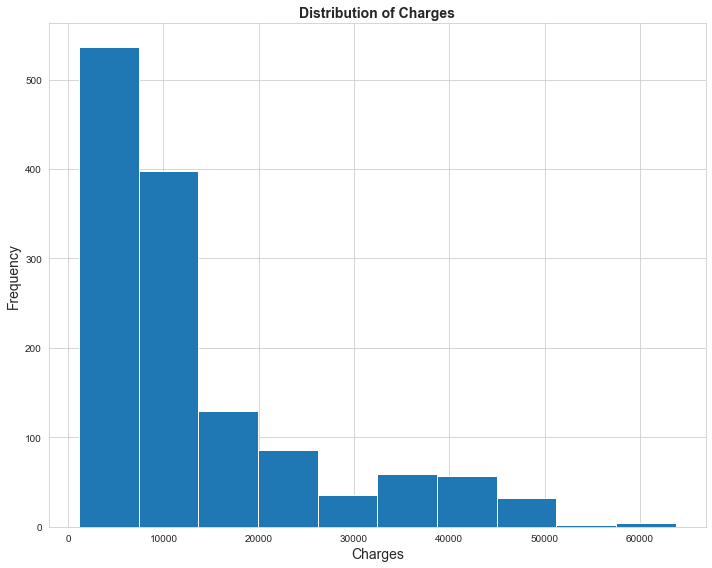

In [6]:
plt.figure(figsize=[10, 8])
plt.hist(insurance.charges)
plt.title("Distribution of Charges", fontweight="bold", fontsize=14)
plt.xlabel("Charges", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()

<Figure size 720x576 with 0 Axes>

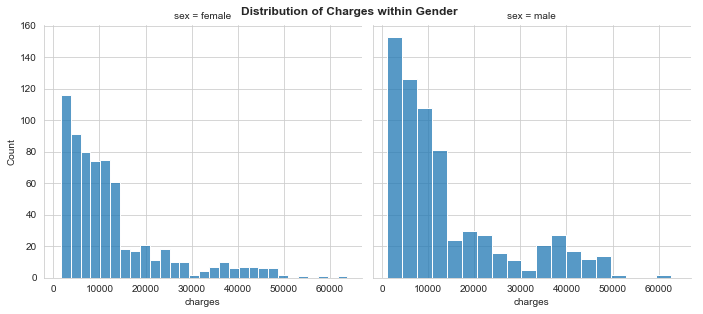

In [7]:
plt.figure(figsize= [10, 8])
grid = sns.FacetGrid(insurance, col="sex", height=4.4, aspect=1.1)
grid.map(sns.histplot, "charges")
grid.add_legend()
grid.fig.suptitle("Distribution of Charges within Gender", fontsize=12, fontweight="bold")
grid.set_ylabels("Count")
plt.tight_layout()

<Figure size 720x576 with 0 Axes>

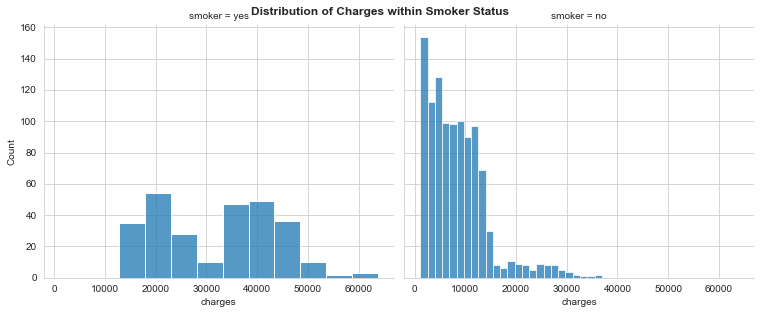

In [8]:
plt.figure(figsize= [10, 8])
grid = sns.FacetGrid(insurance, col="smoker", height=4.4, aspect=1.2)
grid.map(sns.histplot, "charges")
grid.add_legend()
grid.fig.suptitle("Distribution of Charges within Smoker Status", fontsize=12, fontweight="bold")
grid.set_ylabels("Count")
plt.tight_layout()

<Figure size 720x576 with 0 Axes>

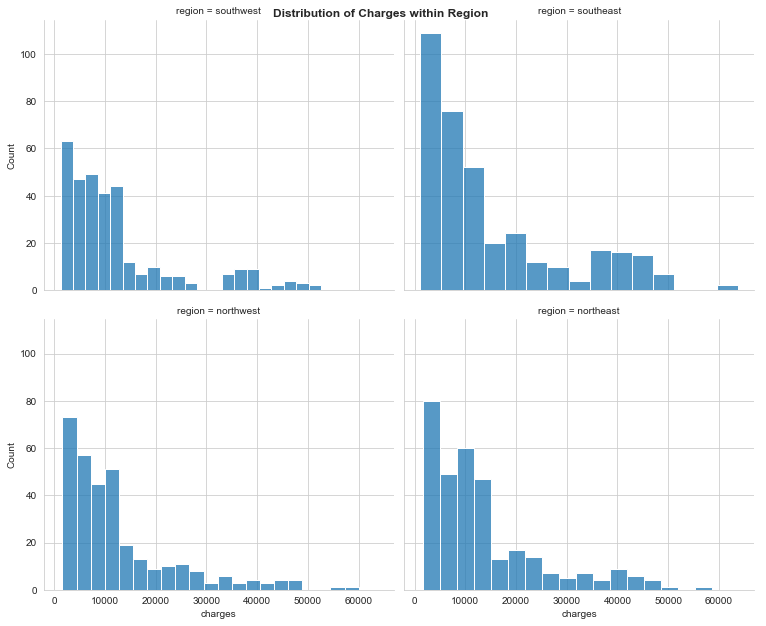

In [9]:
plt.figure(figsize=[10, 8])
grid = sns.FacetGrid(insurance, col="region", height=4.4, aspect=1.2, col_wrap=2)
grid.map(sns.histplot, "charges")
grid.add_legend()
grid.fig.suptitle(
    "Distribution of Charges within Region", fontsize=12, fontweight="bold"
)
grid.set_ylabels("Count")
plt.tight_layout()

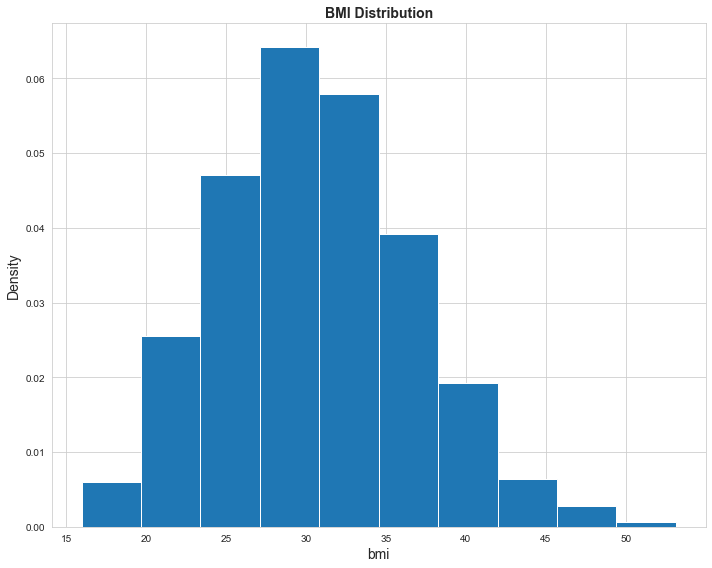

In [10]:
plt.figure(figsize= [10, 8])
plt.hist(insurance.bmi, density=True)
plt.title("BMI Distribution", fontweight="bold", fontsize= 14)
plt.ylabel('Density', fontsize= 14)
plt.xlabel('bmi', fontsize= 14)
plt.tight_layout()

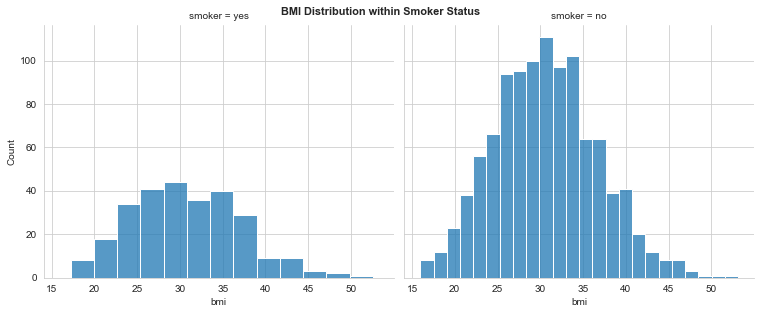

In [11]:
grid = sns.FacetGrid(insurance, col="smoker", height=4.4, aspect=1.2)
grid.map(sns.histplot, "bmi")
grid.add_legend()
grid.fig.suptitle(
    "BMI Distribution within Smoker Status", fontsize=11, fontweight="bold"
)
grid.set_ylabels("Count")
plt.tight_layout()

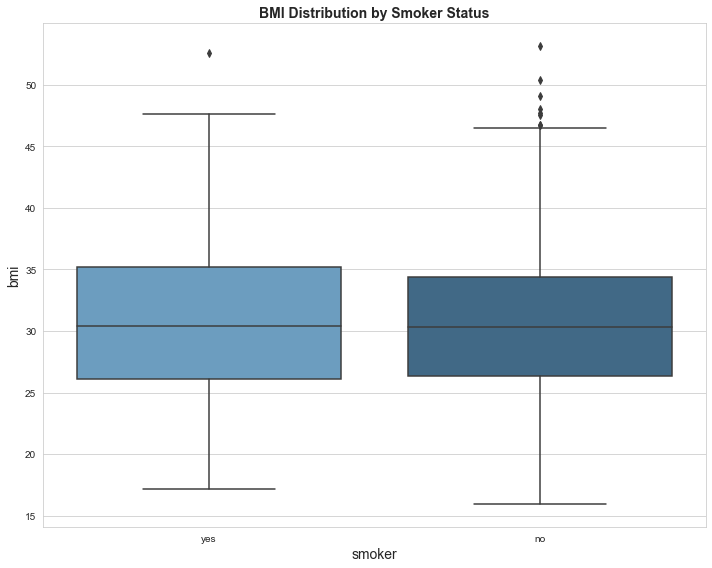

In [12]:
plt.figure(figsize=[10, 8])
sns.boxplot(x="smoker", y="bmi", data=insurance, palette="Blues_d")
plt.title("BMI Distribution by Smoker Status", fontweight="bold", fontsize=14)
plt.ylabel("bmi", fontsize=14)
plt.xlabel("smoker", fontsize=14)
plt.tight_layout()
# No discernable difference between bmis of smokers and non-smokers other than the presence of fewer smokers

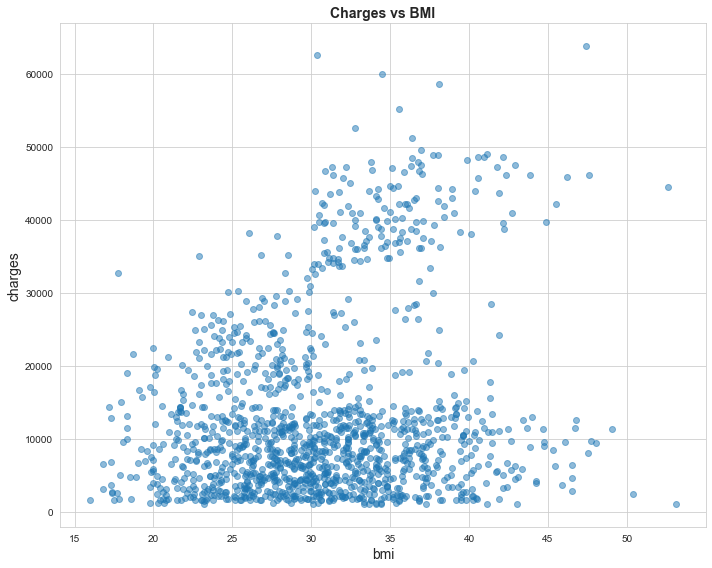

In [13]:
plt.figure(figsize=[10, 8])
plt.scatter(insurance.bmi, insurance.charges, alpha=0.5)
plt.title("Charges vs BMI", fontweight="bold", fontsize= 14)
plt.xlabel("bmi", fontsize= 14)
plt.ylabel("charges", fontsize= 14)
plt.tight_layout()

Text(0.5, 1.0, 'Charges vs BMI: hue= Smoker')

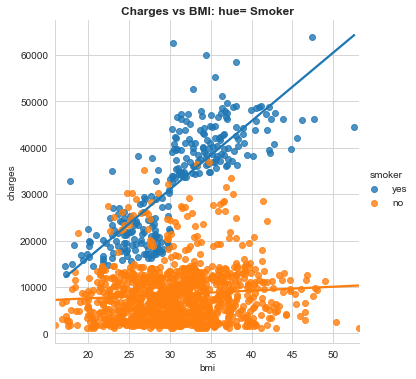

In [14]:
sns.lmplot(x="bmi", y="charges", fit_reg=True, ci=None, hue="smoker", data=insurance)
plt.title("Charges vs BMI: hue= Smoker", fontweight="bold")

Text(0.5, 1.0, 'Charges vs BMI: hue= Region')

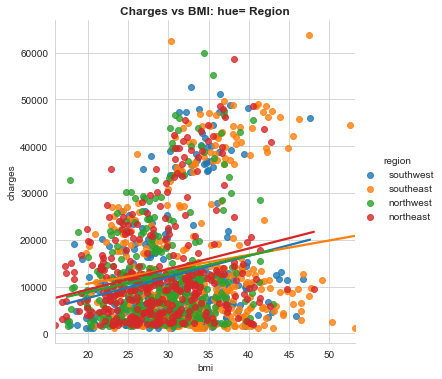

In [15]:
sns.lmplot(x="bmi", y="charges", fit_reg=True, ci=None, hue="region", data=insurance)
plt.title("Charges vs BMI: hue= Region", fontweight="bold")

Text(0.5, 1.0, 'Charges vs BMI: hue= Children')

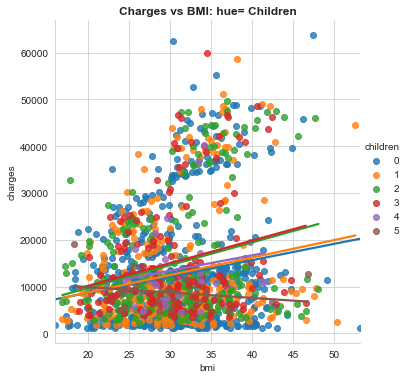

In [16]:
sns.lmplot(x="bmi", y="charges", fit_reg=True, ci=None, hue="children", data=insurance)
plt.title("Charges vs BMI: hue= Children", fontweight="bold")

Text(0.5, 1.0, 'Charges vs BMI: hue= Sex')

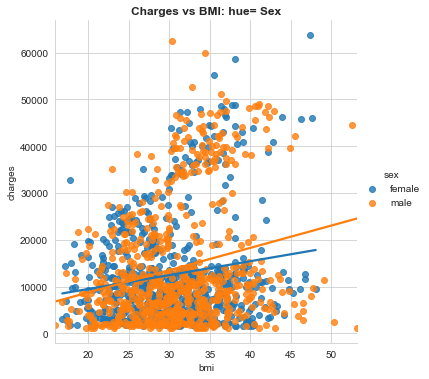

In [17]:
sns.lmplot(x="bmi", y="charges", fit_reg=True, ci=None, hue="sex", data=insurance)
plt.title("Charges vs BMI: hue= Sex", fontweight="bold")

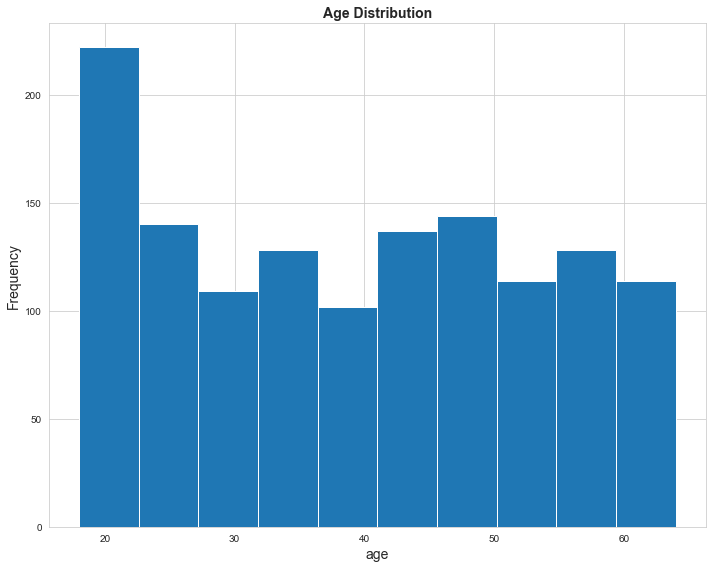

In [18]:
plt.figure(figsize=[10, 8])
plt.hist(insurance.age)
plt.title("Age Distribution", fontweight="bold", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("age", fontsize=14)
plt.tight_layout()

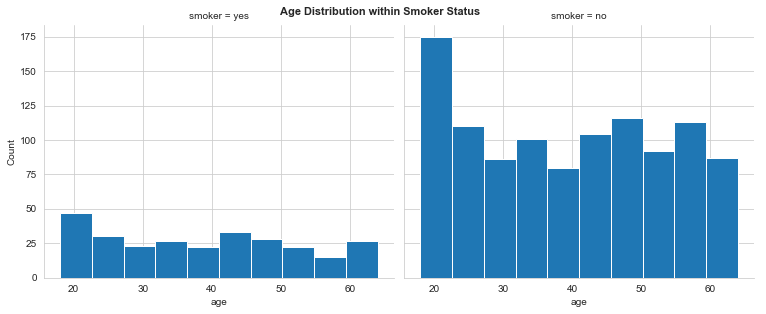

In [19]:
grid = sns.FacetGrid(insurance, col="smoker", height=4.4, aspect=1.2)
grid.map(plt.hist, "age")
grid.add_legend()
grid.fig.suptitle(
    "Age Distribution within Smoker Status", fontsize=11, fontweight="bold"
)
grid.set_ylabels("Count")
plt.tight_layout()
# Smokers exist in every age group

Text(0.5, 1.0, 'Charges vs Age')

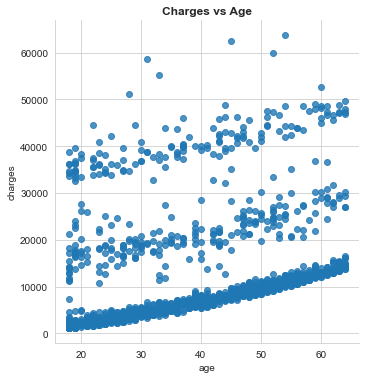

In [20]:
sns.lmplot(x="age", y="charges", fit_reg=False, data=insurance)
plt.title("Charges vs Age", fontweight="bold")

Text(0.5, 1.0, 'Charges vs Age: hue= Smoker')

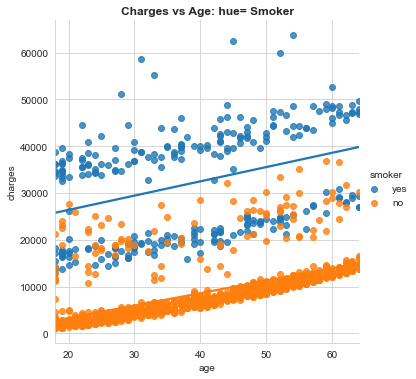

In [21]:
sns.lmplot(x="age", y="charges", fit_reg=True, hue= 'smoker',ci= None, data=insurance)
plt.title("Charges vs Age: hue= Smoker", fontweight="bold")

Text(0.5, 1.0, 'Charges vs Age: hue= Region')

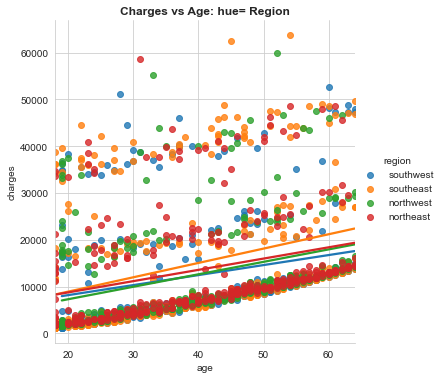

In [22]:
sns.lmplot(x="age", y="charges", fit_reg=True, hue= 'region',ci= None, data=insurance)
plt.title("Charges vs Age: hue= Region", fontweight="bold")

Text(0.5, 1.0, 'Charges vs Age: hue= Children')

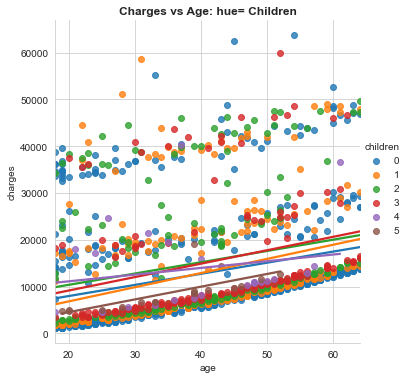

In [23]:
sns.lmplot(x="age", y="charges", fit_reg=True, hue= 'children',ci= None, data=insurance)
plt.title("Charges vs Age: hue= Children", fontweight="bold")

Text(0.5, 1.0, 'Charges vs Age: hue= Sex')

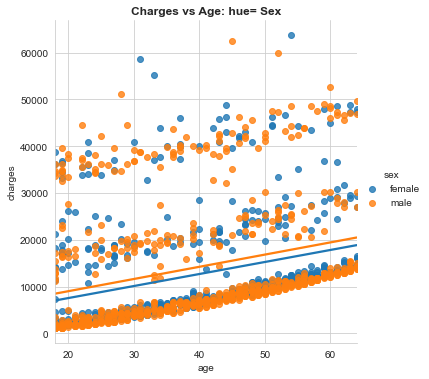

In [24]:
sns.lmplot(
    x="age",
    y="charges",
    fit_reg=True,
    hue="sex",
    ci=None,
    data=insurance,
)
plt.title("Charges vs Age: hue= Sex", fontweight="bold")

In [25]:
insurance[["smoker", "charges"]].groupby("smoker").median().sort_values(
    by="charges", ascending=False
).round(2) # Median charges by smoker status

,charges
smoker,
yes,34456.35
no,7345.40


In [26]:
insurance[["children", "charges"]].groupby("children").median().sort_values(
    by="charges", ascending=False
).round(2) # Median charges by number of children

,charges
children,
4,11033.66
3,10600.55
0,9856.95
2,9264.98
5,8589.56
1,8483.87


In [27]:
insurance[["region", "charges"]].groupby("region").median().sort_values(
    by="charges", ascending=False
).round(2) # Median charges by region

,charges
region,
northeast,10057.65
southeast,9294.13
northwest,8965.80
southwest,8798.59


In [28]:
insurance[["sex", "charges"]].groupby("sex").median().sort_values(
    by="charges", ascending=False
).round(2) # Median charges by gender

,charges
sex,
female,9412.96
male,9369.62


Text(0.5, 1.0, 'Gender Frequency')

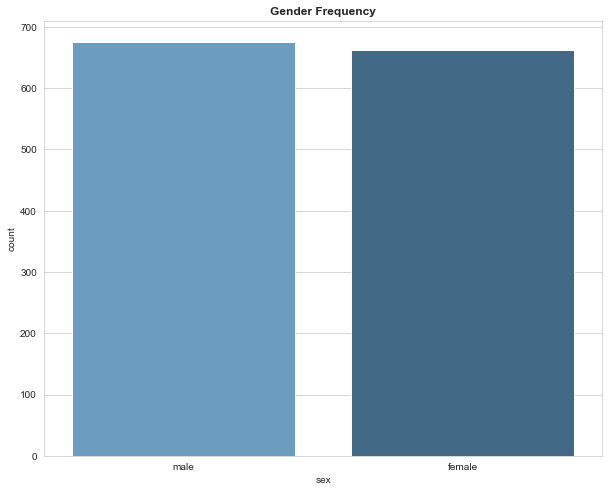

In [29]:
plt.figure(figsize= [10, 8])
sns.countplot(
    x="sex",
    data=insurance,
    order=insurance.sex.value_counts().index.values,
    palette="Blues_d",
)
plt.title("Gender Frequency", fontweight="bold")

Text(0.5, 1.0, 'Region Frequency')

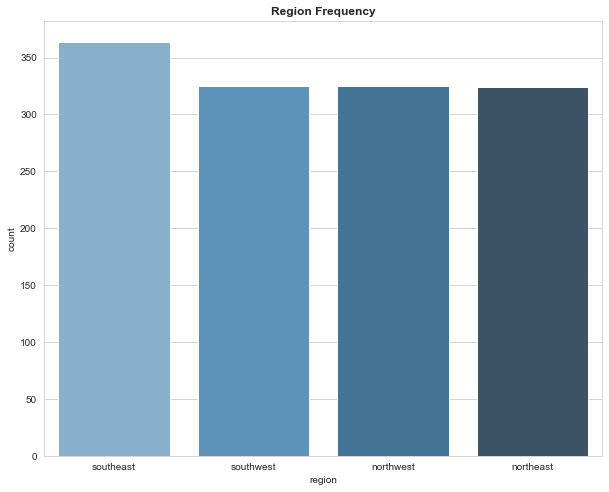

In [30]:
plt.figure(figsize= [10, 8])
sns.countplot(
    x="region",
    data=insurance,
    order=insurance.region.value_counts().index.values,
    palette="Blues_d",
)
plt.title("Region Frequency", fontweight="bold")

Text(0.5, 1.0, 'Smoker Frequency')

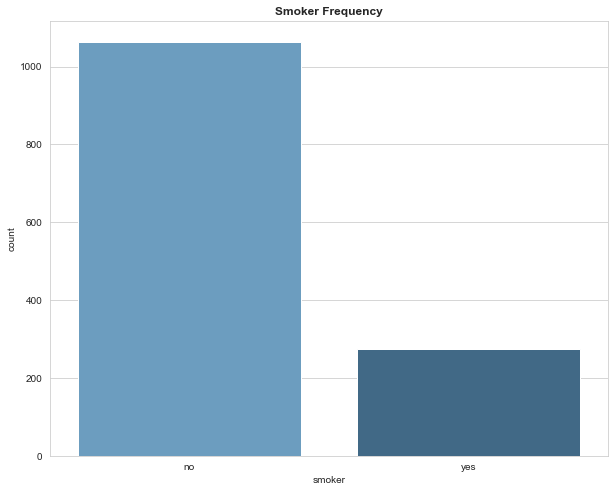

In [31]:
plt.figure(figsize= [10, 8])
sns.countplot(
    x="smoker",
    data=insurance,
    order=insurance.smoker.value_counts().index.values,
    palette="Blues_d",
)
plt.title("Smoker Frequency", fontweight="bold")

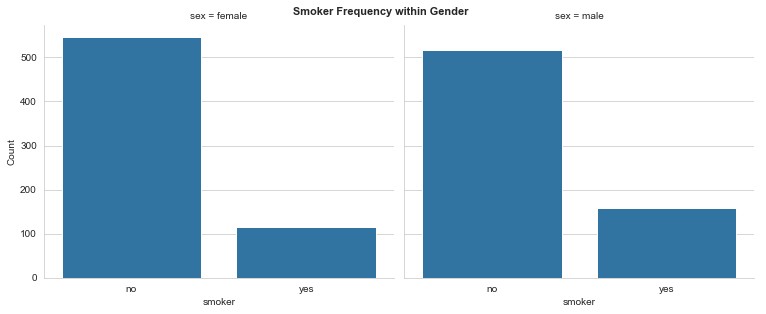

In [32]:
grid = sns.FacetGrid(insurance, col="sex", height=4.4, aspect=1.2)
grid.map(sns.countplot, "smoker", order=insurance.smoker.value_counts().index.values)
grid.add_legend()
grid.fig.suptitle("Smoker Frequency within Gender", fontsize=11, fontweight="bold")
grid.set_ylabels("Count")
plt.tight_layout()

Text(0.5, 1.0, 'Children Frequency')

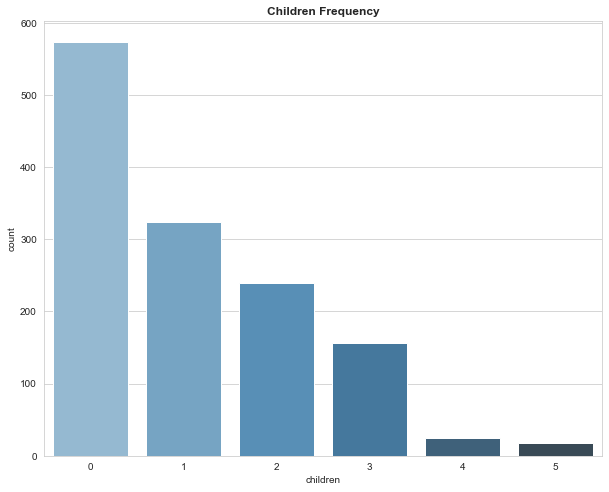

In [33]:
plt.figure(figsize= [10, 8])
sns.countplot(
    x="children",
    data=insurance,
    order=insurance.children.value_counts().index.values,
    palette="Blues_d",
)
plt.title("Children Frequency", fontweight="bold")

#### Section Notes : 
1. Possible new features that can be created and inspected for importance:
- `bmi:region`
- `bmi:smoker`
- `bmi:children`
- `bmi:sex`
- `age:region`
- `age:children`

Why? Because the regression lines generated show a relationship between these features, as it relates to charges, that go beyond what can be explained by change in intercepts alone i.e. a difference in slope can be observed.

2. Within features(`smoker`, `sex`, `region`, `children`), different classes are almost equally represented. However, in `smoker` and `children`, there is a dominance in the representation of those who do not smoke, and those with no children, respectively. This could affect the model's ability to learn from classes of minority representation.

<a id="3"></a> <br>
### 3. Feature modification, Feature creation, and Correlation check

In this section focus will be on:

- Creating age bins and exploring it for more information. 
- Creating new features recommended earlier in the data exploration and analyses section.
- Creating a correlation matrix to aid the feature selection process, and primarily to avoid inclusion of correlated predictors into models.

In [34]:
bins = [17, 26, 35, 44, 53, 62, 71]
labels = [
    "early adult",
    "adult",
    "older adult",
    "early middle age",
    "middle age",
    "senior",
]

In [35]:
insurance["age_bin"] = pd.cut(insurance["age"], bins, labels=labels)
insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_bin
0,19,female,27.90,0,yes,southwest,16884.92,early adult
1,18,male,33.77,1,no,southeast,1725.55,early adult
2,28,male,33.00,3,no,southeast,4449.46,adult
3,33,male,22.70,0,no,northwest,21984.47,adult
4,32,male,28.88,0,no,northwest,3866.86,adult


In [36]:
insurance.age_bin.value_counts() # age bin count

early adult         334
early middle age    259
adult               240
older adult         235
middle age          225
senior               45
Name: age_bin, dtype: int64

In [37]:
insurance[["age_bin", "charges"]].groupby("age_bin").median().sort_values(
    by="charges", ascending=False
).round(2) # median charges by age category

,charges
age_bin,
senior,14474.68
middle age,12643.38
early middle age,9877.61
older adult,7265.70
adult,5073.88
early adult,2731.01


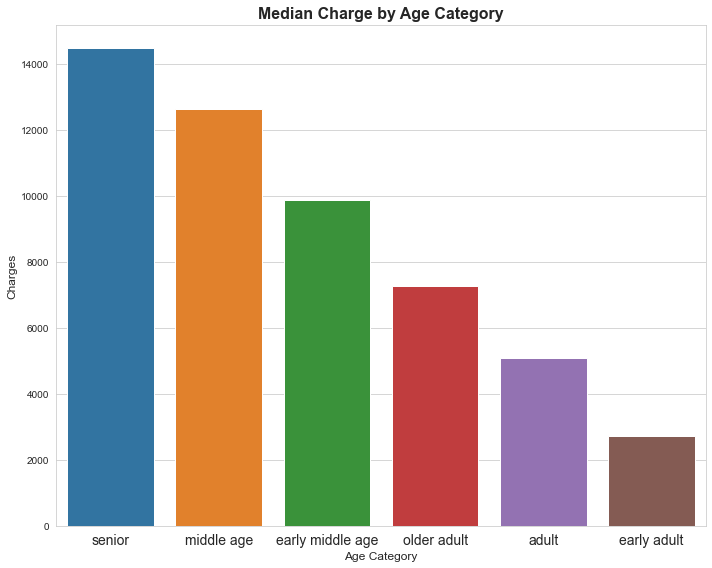

In [38]:
plt.figure(figsize=[10, 8])
sns.barplot(
    x="age_bin",
    y="charges",
    order=insurance[["age_bin", "charges"]]
    .groupby("age_bin")
    .median()
    .sort_values(by="charges", ascending=False)
    .index.values,
    ci=None,
    estimator=np.median,
    data=insurance,
)
plt.title("Median Charge by Age Category", fontweight="bold", fontsize=16)
plt.xticks(fontsize=14)
plt.xlabel("Age Category", fontsize=12)
plt.ylabel("Charges", fontsize=12)
plt.tight_layout()
# Further confirms age as an important charge predictor

<Figure size 1080x720 with 0 Axes>

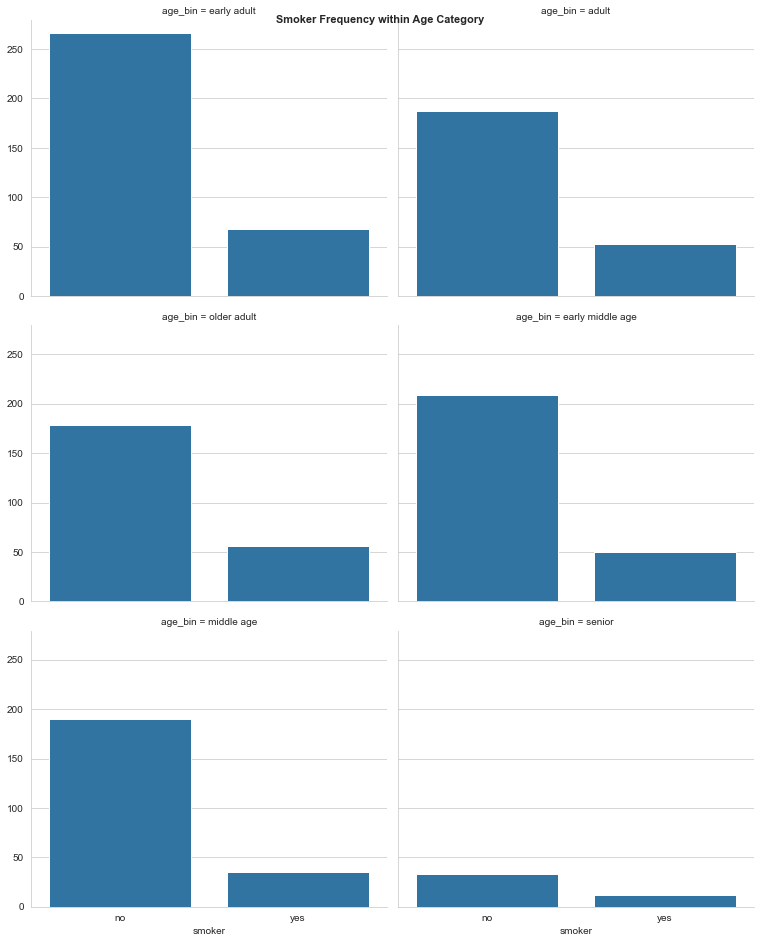

In [39]:
plt.figure(figsize= [15, 10])
grid = sns.FacetGrid(insurance, col="age_bin", height=4.4, aspect=1.2, col_wrap= 2)
grid.map(sns.countplot, "smoker", order=insurance.smoker.value_counts().index.values)
grid.add_legend()
grid.fig.suptitle("Smoker Frequency within Age Category", fontsize=11, fontweight="bold")
plt.tight_layout()

In [40]:
df = insurance.copy()[["charges", "age", "bmi", "sex", "region", "smoker", "children"]]
df["sex"] = df.sex.map({"male": 0, "female": 1})
df["smoker"] = df.smoker.map({"yes": 1, "no": 0})
df["region"] = df.region.map(
    {"southwest": 0, "southeast": 1, "northwest": 2, "northeast": 3}
)
df["bmi_region"] = df.bmi * df.region
df["bmi_smoker"] = df.bmi * df.smoker
df["bmi_children"] = df.bmi * df.children
df["bmi_sex"] = df.bmi * df.sex
df["age_children"] = df.age * df.children
df["age_region"] = df.age * df.region
df.head()

,charges,age,bmi,sex,region,smoker,children,bmi_region,bmi_smoker,bmi_children,bmi_sex,age_children,age_region
0,16884.92,19,27.90,1,0,1,0,0.00,27.9,0.00,27.9,0,0
1,1725.55,18,33.77,0,1,0,1,33.77,0.0,33.77,0.0,18,18
2,4449.46,28,33.00,0,1,0,3,33.00,0.0,99.00,0.0,84,28
3,21984.47,33,22.70,0,2,0,0,45.40,0.0,0.00,0.0,0,66
4,3866.86,32,28.88,0,2,0,0,57.76,0.0,0.00,0.0,0,64


Text(0.5, 1.0, 'Feature Correlation Matrix')

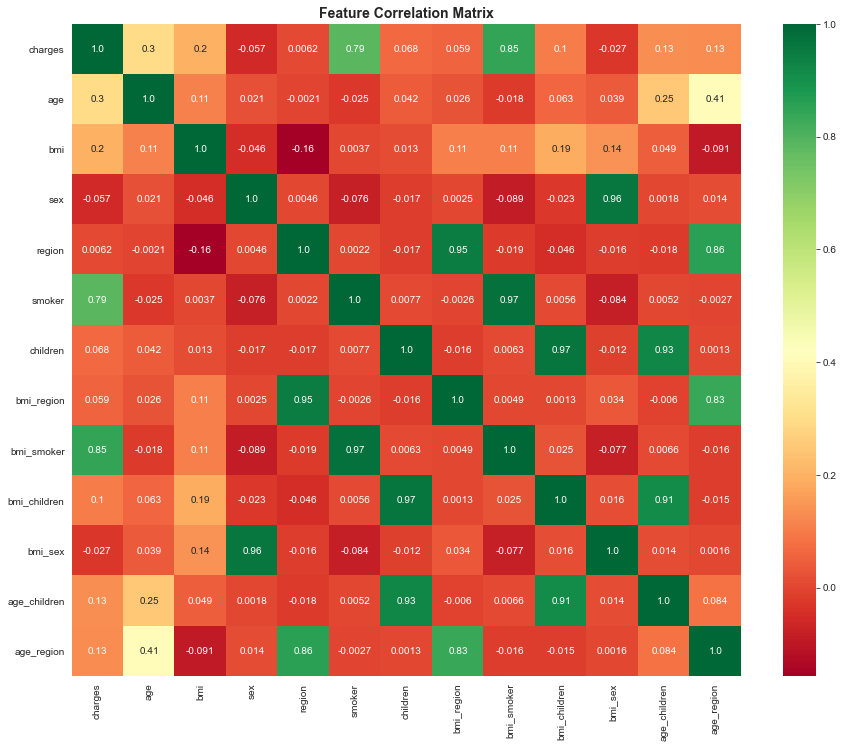

In [41]:
corr_matrix = df.corr()
plt.figure(figsize=[15, 12])
sns.heatmap(corr_matrix, annot=True, fmt=".2", cmap="RdYlGn")
plt.title("Feature Correlation Matrix", fontweight="bold", fontsize=14)

#### Section Notes:
1. The creation of age bins give more insight on the relationship between `age` and `charges`- as seen, older people are charged more. This gives evidence to the possibility that age could be an important predictor. 
2. The criteria used in the selection of predictors that will be included in the model are as follows:
- `the selected feature is not strongly correlated with another feature.`
- `when features are strongly correlated, the one with a stronger correlation to the outcome variable will be selected.`

Based on this criteria, the selected features are:
- `bmi_smoker`
- `age`
- `bmi`
- `sex`
- `age_region`
- `age_children`

<a id="4"></a> <br>
### 4. Model Implementation and Evaluation.

The focus in this section will be on the following: 
- Separation of the dataset into training and test sets.
- Fitting two models with the training set. 
- Printing summary evaluations of the two models- with emphasis on `Coefficient of Determination`($R^{2}$). 
- Visualization of the coefficients for each predictor to observe predictor importance. 
- Evaluation of model predictive performance on the test set by calculating Predictive Root Mean Squared Error(`RMSE`) for each model. 

In [42]:
# 8Train-Test Split
np.random.seed(123)
indices = range(len(insurance))
train_ind = np.random.choice(indices, size=int(0.8 * len(insurance)), replace=False)
test_ind = list(set(indices) - set(train_ind))
train_set = insurance.iloc[train_ind]
test_set = insurance.iloc[test_ind]

In [43]:
model1 = sm.OLS.from_formula(
    "charges ~ age + sex + bmi + children + smoker + region", data=train_set
).fit() # using all features
model2 = sm.OLS.from_formula(
    "charges ~ age + age:region + age:children + bmi + bmi:smoker + sex", data=train_set
).fit() # using criteria-selected features

In [44]:
print("Coefficient of Determination (R\u00b2):")
print("--" * 15)
print("model1:", model1.rsquared)
print("model2:", model2.rsquared)

Coefficient of Determination (R²):
------------------------------
model1: 0.7539845981751593
model2: 0.823408735975553


In [45]:
print("Coefficient of Determination (Adjusted R\u00b2):")
print("--" * 15)
print("model1:", model1.rsquared_adj)
print("model2:", model2.rsquared_adj)

Coefficient of Determination (Adjusted R²):
------------------------------
model1: 0.7521296281331247
model2: 0.8220772278584978


In [46]:
# Detailed Model1 Summary:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     406.5
Date:                Thu, 05 May 2022   Prob (F-statistic):          8.69e-317
Time:                        22:30:47   Log-Likelihood:                -10816.
No. Observations:                1070   AIC:                         2.165e+04
Df Residuals:                    1061   BIC:                         2.170e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.175e+04   1

In [47]:
# Detailed Model2 Summary:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     618.4
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        22:30:47   Log-Likelihood:                -10639.
No. Observations:                1070   AIC:                         2.130e+04
Df Residuals:                    1061   BIC:                         2.134e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -6

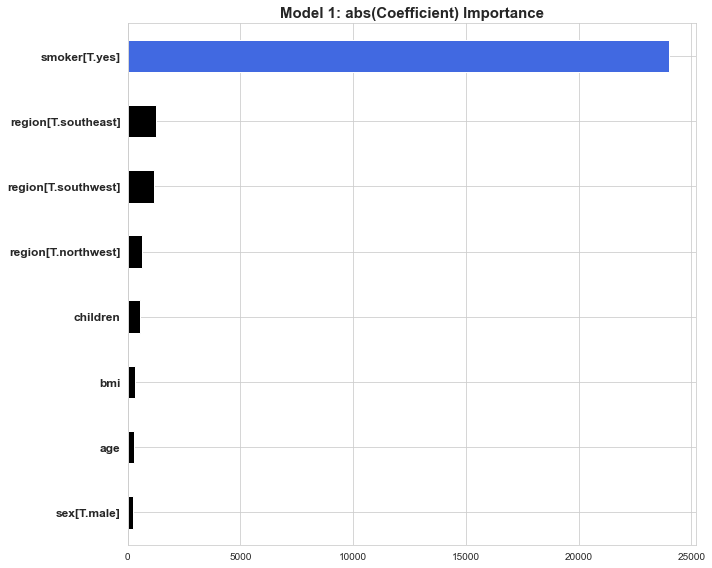

In [48]:
model1_params = model1.params.abs().sort_values().drop("Intercept") # Intercept not needed
plt.figure(figsize=[10, 8])
model1_params.plot(kind="barh", color=["k", "k", "k", "k", "k", "k", "k", "royalblue"])
plt.yticks(fontsize=12, fontweight="bold")
plt.title("Model 1: abs(Coefficient) Importance", fontweight="bold", fontsize=15)
plt.tight_layout()

In [49]:
model2.params # Model 2 predictor coefficients

Intercept                 -6998.386391
sex[T.male]                -384.157357
age                         270.833490
age:region[T.northwest]     -13.967191
age:region[T.southeast]     -23.580373
age:region[T.southwest]     -23.524873
age:children                 13.545043
bmi                         155.422428
bmi:smoker[T.yes]           809.786198
dtype: float64

**Model 2 Line Equation for a Smoker in the Northwest with No Children**: 

`-6998.39 - 384.16*sex(T.male) + 270.41*age + 965.21*bmi`

**Model 2 Line Equation for a Non-Smoker in the Northwest with No Children**: 

`-6998.39 - 384.16*sex(T.male) + 270.41*age + 155.42*bmi`

In [50]:
# tabulated coefficients for a Smoker in the Northwest with No Children
labels = model2.params.drop(
    [
        "Intercept",
        "bmi:smoker[T.yes]",
        "age:region[T.northwest]",
        "age:region[T.southeast]",
        "age:region[T.southwest]",
        "age:children",
    ]
).index.values
values = [384.16, 270.41, 965.21]
smoker_coeff = pd.Series(values, labels).sort_values()
print(smoker_coeff)

age            270.41
sex[T.male]    384.16
bmi            965.21
dtype: float64


In [51]:
# tabulated coefficients for non-smokers in the Northwest with No Children
labels = model2.params.drop(
    [
        "Intercept",
        "bmi:smoker[T.yes]",
        "age:region[T.northwest]",
        "age:region[T.southeast]",
        "age:region[T.southwest]",
        "age:children",
    ]
).index.values
values = [384.16, 270.41, 155.42]
nonsmoker_coeff = pd.Series(values, labels).sort_values()
print(nonsmoker_coeff)

bmi            155.42
age            270.41
sex[T.male]    384.16
dtype: float64


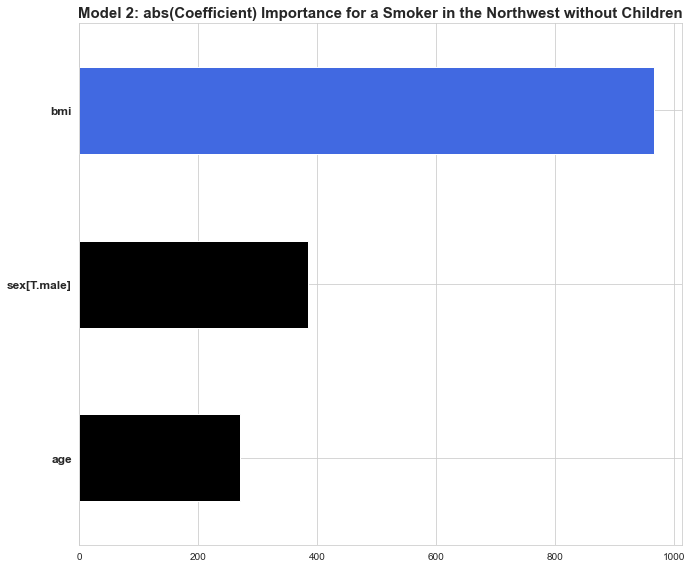

In [52]:
plt.figure(figsize=[10, 8])
smoker_coeff.plot(kind="barh", color=["k", "k", "royalblue"])
plt.yticks(fontsize=12, fontweight="bold")
plt.title(
    "Model 2: abs(Coefficient) Importance for a Smoker in the Northwest without Children",
    fontweight="bold",
    fontsize=15,
)
plt.tight_layout()

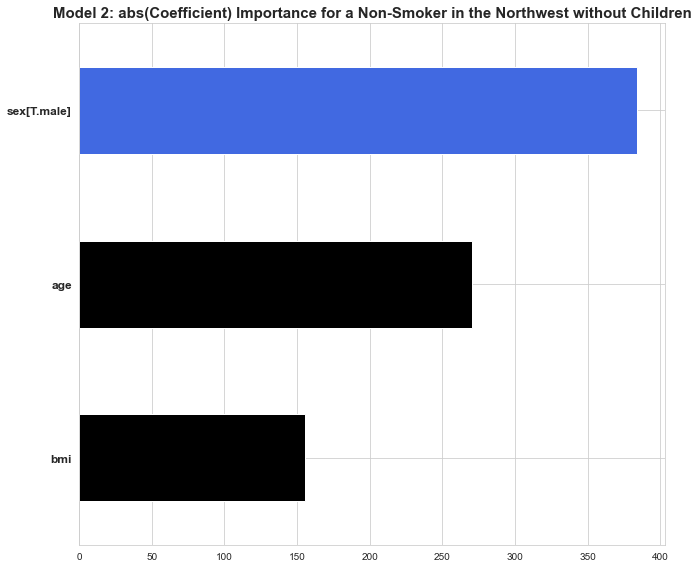

In [53]:
plt.figure(figsize=[10, 8])
nonsmoker_coeff.plot(kind="barh", color=["k", "k", "royalblue"])
plt.yticks(fontsize=12, fontweight="bold")
plt.title(
    "Model 2: abs(Coefficient) Importance for a Non-Smoker in the Northwest without Children",
    fontweight="bold",
    fontsize=15,
)
plt.tight_layout()

In [54]:
model1_predict = model1.predict(test_set)
model2_predict = model2.predict(test_set)
model1_rmse = np.mean((test_set.charges - model1_predict) ** 2) ** 0.5
model2_rmse = np.mean((test_set.charges - model2_predict) ** 2) ** 0.5
print("Predictive Root Mean Squared Error (RMSE): Model1 & Model2")
print("--" * 30)
print('Model1:', round(model1_rmse, 2))
print('Model2: ', round(model2_rmse, 2))
      

Predictive Root Mean Squared Error (RMSE): Model1 & Model2
------------------------------------------------------------
Model1: 6438.8
Model2:  5419.42


#### Section Notes:
1. Based on its ability to explain the variability in `charges`, and its accuracy in predicting `charges` in the test set, model 2 outperforms model 1 significantly. 
2. Model 2 provides insight on the interaction between `bmi` and `smoker`. For smokers we see that more importance is given to `bmi` as a predictor of `charges`. However, for non-smokers, more importance is given to `sex` and `age` as predictors of `charges`. 

<a id="5"></a> <br>
### 5. Verification of Linear Regression Assumptions.

In this section, using residuals calculated from the test set, the following assumptions will tested:
- Normality of the Residuals Distribution- using a histogram plot.
- Homoscedasticity - using scatter plot of Residuals vs Predicted Charges. 

**Note**: `A violation of the multicollinearity assumption was prevented during the feature selection process- highly correlated predictors were not included in the models.`

In [55]:
model1_residuals = test_set.charges - model1_predict
model2_residuals = test_set.charges - model2_predict

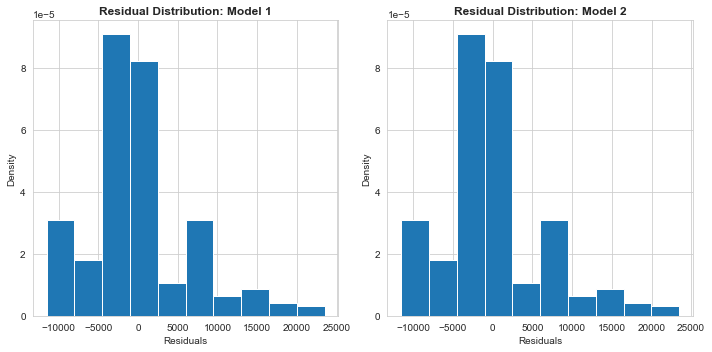

In [56]:
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.hist(model1_residuals, density=True)
plt.title("Residual Distribution: Model 1", fontweight="bold")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.subplot(1, 2, 2)
plt.hist(model1_residuals, density=True)
plt.title("Residual Distribution: Model 2", fontweight="bold")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.tight_layout()

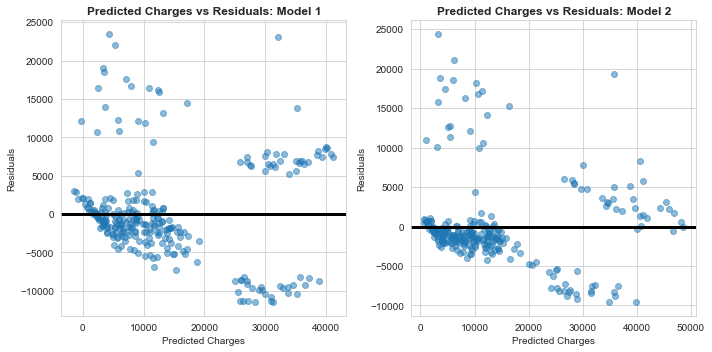

In [57]:
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.scatter(model1_predict, model1_residuals, alpha=0.5)
plt.title("Predicted Charges vs Residuals: Model 1", fontweight="bold")
plt.axhline(y=0, color='black', linestyle='-', linewidth=3)
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.subplot(1, 2, 2)
plt.scatter(model2_predict, model2_residuals, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='-', linewidth=3)
plt.title("Predicted Charges vs Residuals: Model 2", fontweight="bold")
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.tight_layout()

#### Section Notes:
1. The residual distributions from both models are skewed to the right- violating the normality assumption. 
2. The asymmetry and absence of constant spread in Predicted Charges vs Residuals Scatter plot is a violation of the homoscedasicty assumption. 

<a id="6"></a> <br>
### 6. Conclusion.

Given the violation of key linear regression assumptions, opinions based on the models implemented in this project should be developed with great care. Although certain transformation techniques can be used to improve model compliance with these assumptions, there is no assurance that such improvements can be made; and even so, model interpretability will become a bit complicated. 

However, I do believe that the models implemented in this project, especially model 2, can provide a good starting point in an attempt to estimate `charges`. Insights derived from the model suggests that smoking is the most important determinant of `charges`. The simple simulation below of an individual with similar feature entries, in all but smoking status, shows this importance. 


In [58]:
columns = test_set.columns.drop(["charges", "age_bin"])
values = [
    [np.median(test_set.age), "male", np.median(test_set.bmi), 0, "yes", "northwest"],
    [np.median(test_set.age), "male", np.median(test_set.bmi), 0, "no", "northwest"],
]
applicant = pd.DataFrame(columns=columns, data=values)
applicant.round(2)

,age,sex,bmi,children,smoker,region
0,38.0,male,29.88,0,yes,northwest
1,38.0,male,29.88,0,no,northwest


In [59]:
applicant_prediction = model2.predict(applicant)
applicant["predicted charges"] = applicant_prediction
applicant.round(2)

,age,sex,bmi,children,smoker,region,predicted charges
0,38.0,male,29.88,0,yes,northwest,31213.98
1,38.0,male,29.88,0,no,northwest,7021.62
